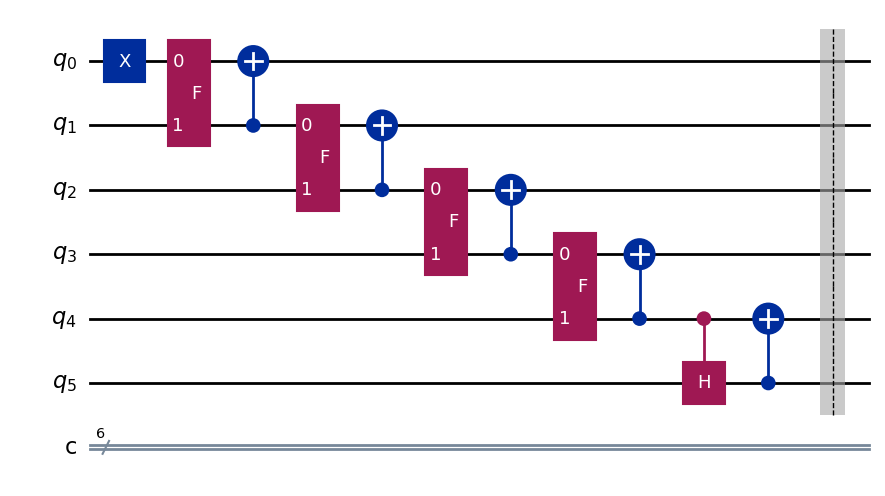

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate

# Định nghĩa cổng F
def F_gate(theta):
    F = np.array([[1, 0, 0, 0],
                  [0, np.cos(theta), 0, np.sin(theta)],
                  [0, 0, 1, 0],
                  [0, np.sin(theta), 0, -np.cos(theta)]])
    return UnitaryGate(F, label='F')

# Số lượng qubit
n = 6
# Tạo danh sách các cổng F với góc theta tương ứng
F_gates = []
for i in range(1, n):
    theta = np.arccos(1 / np.sqrt(n - i + 1))
    F_gates.append(F_gate(theta))
# Ở đây sau nhiều lần thử thì em rút ra rằng mỗi trạng thái khi áp dụng cổng F
# sẽ phải ứng với các góc theta tương ứng chứ không phải sử dụng chỉ mỗi một góc theta cố định như cách hiểu của em tuần tc

# Tạo mạch lượng tử với n qubit
qc = QuantumCircuit(n, n)
qc.x(0)

# Áp dụng cổng F và CNOT cho từng cặp qubit
for i in range(n - 2):
    qc.append(F_gates[i], [i, i + 1])
    qc.cx(i + 1, i)
#Áp dụng cổng CH và CNOT vào cặp qubit cuối cùng
qc.ch(n-2, n-1)
qc.cx(n-1, n-2)
qc.barrier()
# # Áp dụng cổng CNOT vào các qubit
# for i in range (n-1):
#     qc.cx(i+1, 0)


# Hiển thị mạch lượng tử
qc.draw('mpl')


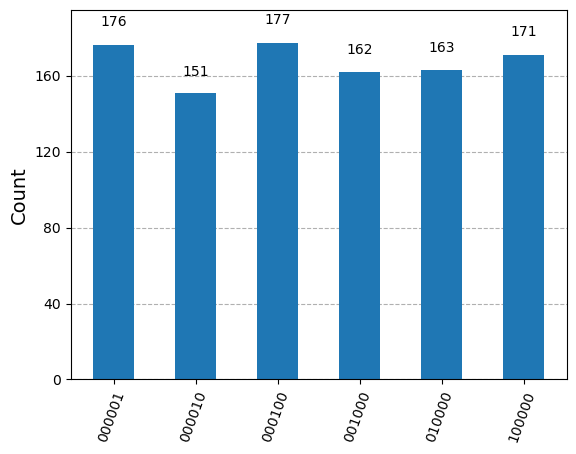

In [2]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
# Thực hiện đo các qubit
qc.measure(range(n), range(n))


backend = BasicSimulator ()
result = backend.run(qc, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)